# Amazon Sales Data Analysis

In [50]:
# importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [52]:
dataset=pd.read_csv('Amazon Sales data.csv')

In [53]:
data=dataset.copy()
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Data Cleaning and Data Transformation

In [54]:
data.shape

(100, 14)

In [55]:
data.index

RangeIndex(start=0, stop=100, step=1)

In [56]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

## checking Null Values

In [57]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [58]:
(data.columns[0:]==0).sum()

0

In [59]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

## Observation
### No missing values present in the dataset.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [61]:
#converting 'Order Date' and 'Ship Date' to datetime format

data["Order ID"]=data["Order ID"].astype(str)
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

## Identifying Outliers

In [62]:
num_df = data.select_dtypes(include='number')
num_df

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,2804,205.70,117.11,576782.80,328376.44,248406.36
2,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,8102,9.33,6.92,75591.66,56065.84,19525.82
4,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...
95,888,109.28,35.84,97040.64,31825.92,65214.72
96,6267,9.33,6.92,58471.11,43367.64,15103.47
97,1485,154.06,90.93,228779.10,135031.05,93748.05
98,5767,81.73,56.67,471336.91,326815.89,144521.02


In [63]:
df_col = data.drop(num_df.columns,axis=1)
df_col.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06


In [64]:
num_df.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


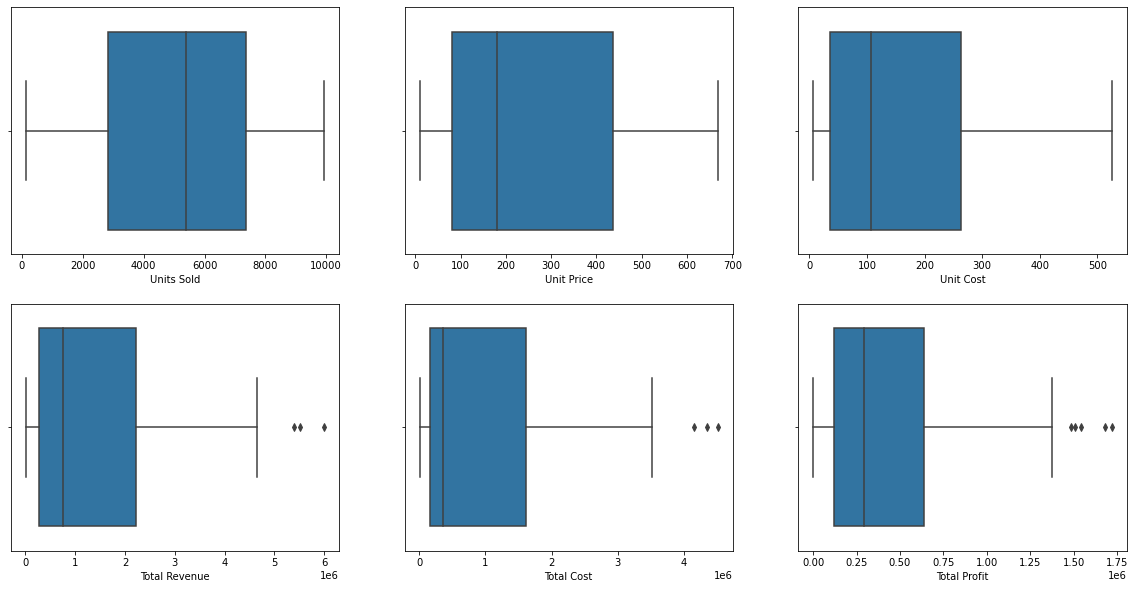

In [65]:
t=1
plt.figure(figsize=[20,10])
for i in num_df.columns:
    plt.subplot(2,3,t)
    sns.boxplot(data[i])
   
    t=t+1
plt.show()

## Observation
### There are outliers in the total revenue, total cost, and total profit columns.

## Removing Outliers 

In [66]:
for i in num_df.columns:
    
    Q1=num_df[i].quantile(0.25)
    Q3=num_df[i].quantile(0.75)
    IQR=Q3-Q1
    data[i]=data[i][((data[i]>Q1-IQR*1.5)&(data[i]<Q3+IQR*1.5))]

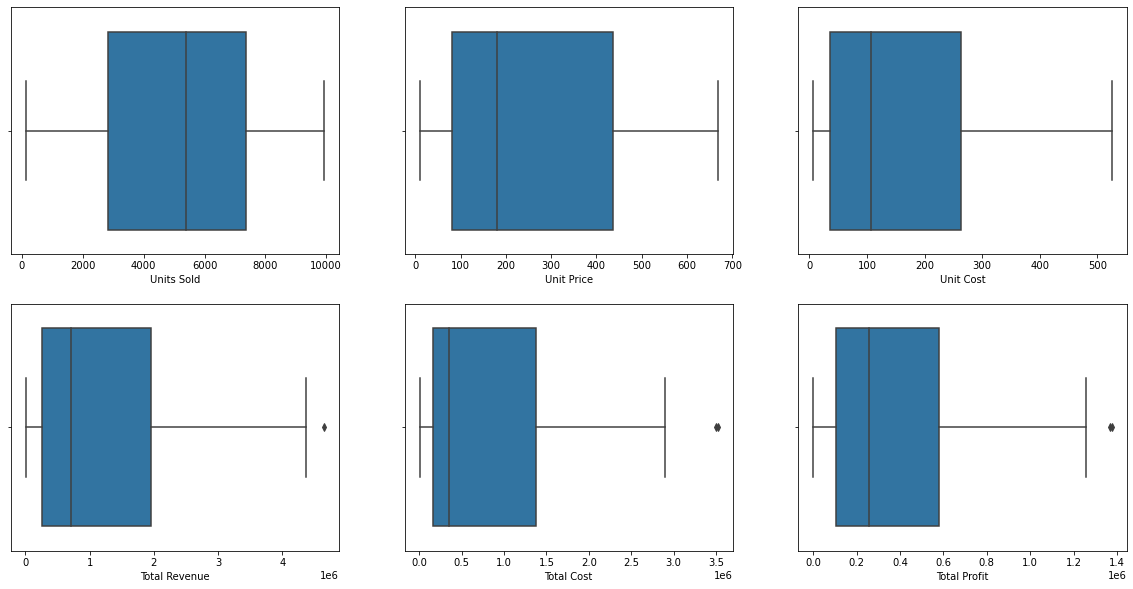

In [67]:
t=1
plt.figure(figsize=[20,10])
for i in num_df.columns:
    plt.subplot(2,3,t)
    sns.boxplot(x=data[i])
   
    t=t+1
plt.show()

In [68]:
data.dropna(inplace= True)

In [69]:
data.shape

(93, 14)

# Saving Dataset After Cleaning.

In [70]:
data.to_csv('new_dataset.csv', index=False)

In [71]:
new_dataset=pd.read_csv('new_dataset.csv')

In [72]:
new_data=new_dataset.copy()
new_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [73]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          93 non-null     object 
 1   Country         93 non-null     object 
 2   Item Type       93 non-null     object 
 3   Sales Channel   93 non-null     object 
 4   Order Priority  93 non-null     object 
 5   Order Date      93 non-null     object 
 6   Order ID        93 non-null     int64  
 7   Ship Date       93 non-null     object 
 8   Units Sold      93 non-null     int64  
 9   Unit Price      93 non-null     float64
 10  Unit Cost       93 non-null     float64
 11  Total Revenue   93 non-null     float64
 12  Total Cost      93 non-null     float64
 13  Total Profit    93 non-null     float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.3+ KB


In [74]:
#converting 'Order Date' and 'Ship Date' to datetime format

new_data['Order Date'] = pd.to_datetime(data['Order Date'])
new_data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [75]:
#Extracting year,month,day from order date

new_data['Year'] = new_data['Order Date'].dt.year
new_data['Month'] = new_data['Order Date'].dt.month
new_data['Year-Month'] = new_data['Order Date'].dt.to_period('M')

In [76]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          93 non-null     object        
 1   Country         93 non-null     object        
 2   Item Type       93 non-null     object        
 3   Sales Channel   93 non-null     object        
 4   Order Priority  93 non-null     object        
 5   Order Date      86 non-null     datetime64[ns]
 6   Order ID        93 non-null     int64         
 7   Ship Date       86 non-null     datetime64[ns]
 8   Units Sold      93 non-null     int64         
 9   Unit Price      93 non-null     float64       
 10  Unit Cost       93 non-null     float64       
 11  Total Revenue   93 non-null     float64       
 12  Total Cost      93 non-null     float64       
 13  Total Profit    93 non-null     float64       
 14  Year            86 non-null     float64       
 15  Month   

In [77]:
new_data.shape

(93, 17)

# Month-wise Sales Analysis

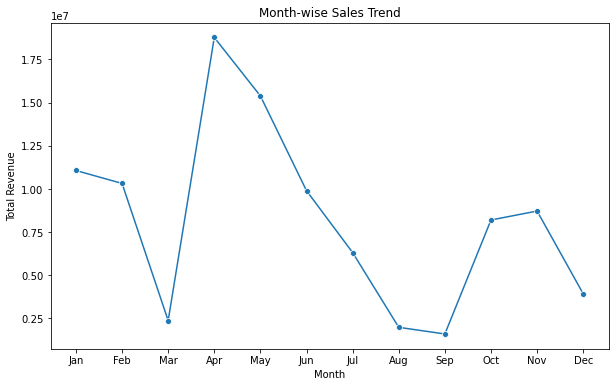

In [78]:
months = range(1, 13)
monthly_sales = [new_data[new_data['Month'] == month]['Total Revenue'].sum() for month in months]
plt.figure(figsize=(10, 6))
sns.lineplot(x=months, y=monthly_sales, marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(months,labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Monthly Sales Trends Across Years

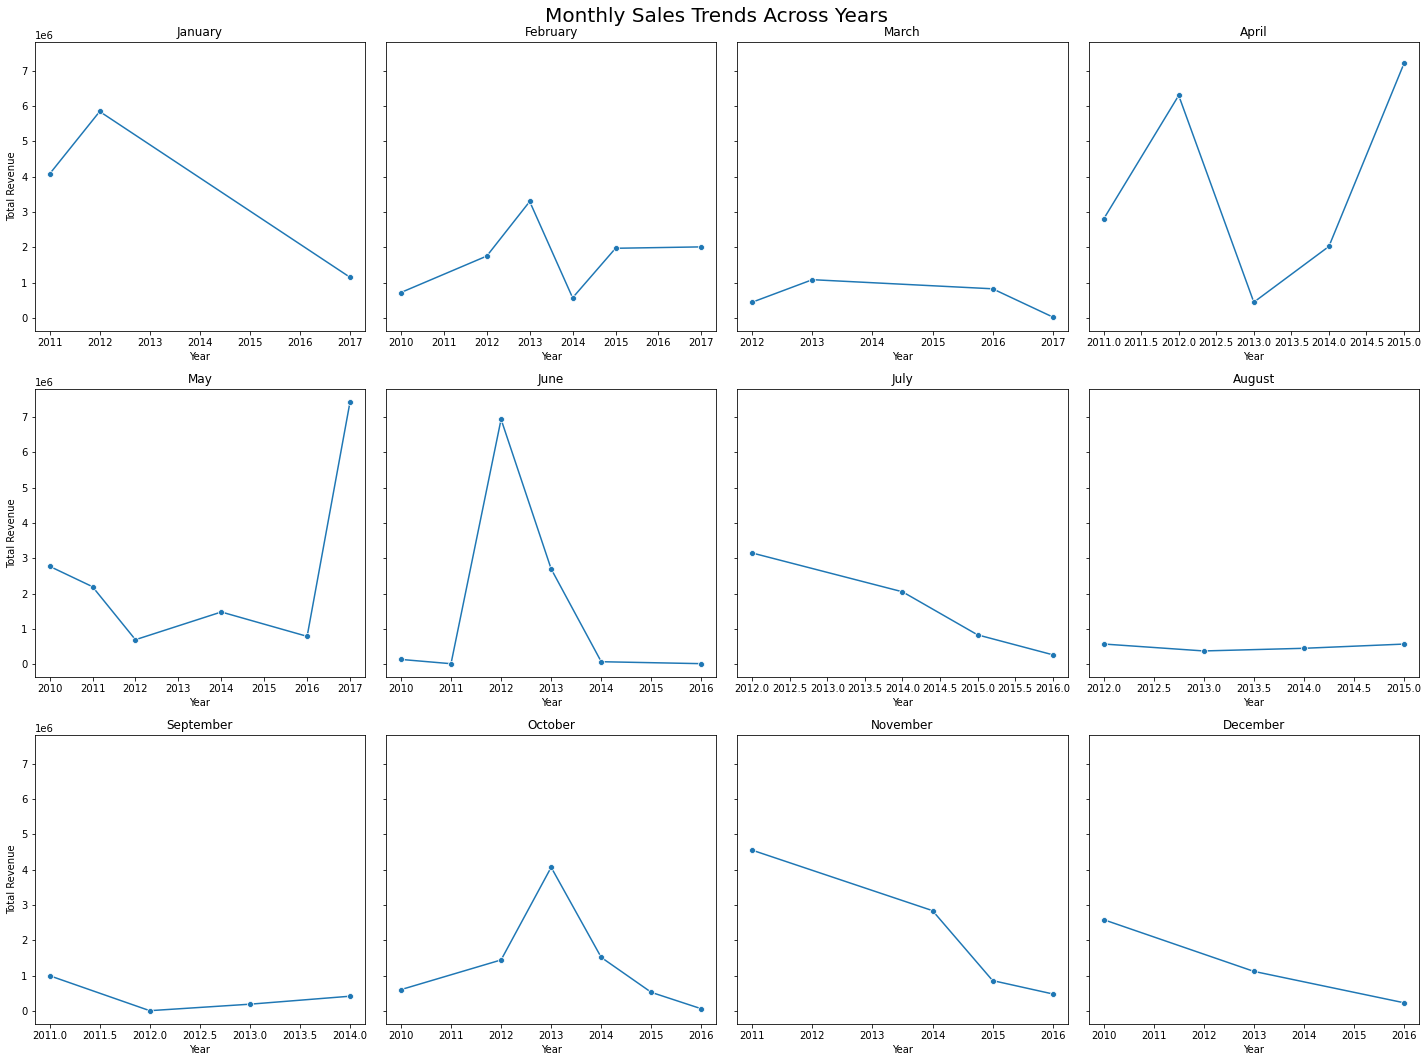

In [79]:
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Monthly Sales Trends Across Years', fontsize=20)

for month in range(1, 13):
    ax = axes[(month-1)//4, (month-1)%4]
    monthly_data = new_data[new_data['Month'] == month]
    yearly_profit = monthly_data.groupby('Year')['Total Revenue'].sum().reset_index()
    sns.lineplot(x='Year', y='Total Revenue', data=yearly_profit, marker='o', ax=ax)
    ax.set(title=month_names[month-1], xlabel='Year', ylabel='Total Revenue')

plt.tight_layout()
plt.show()

# Year-Wise Sales Analysis 

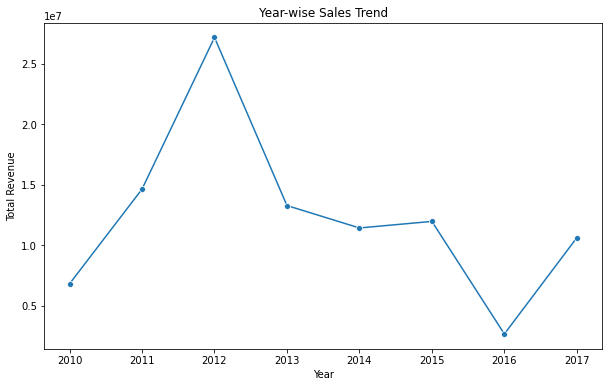

In [80]:
years = sorted(new_data['Year'].unique())
yearly_sales = [new_data[new_data['Year'] == year]['Total Revenue'].sum() for year in years]
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=yearly_sales, marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Yearly Sales Trends Across Months

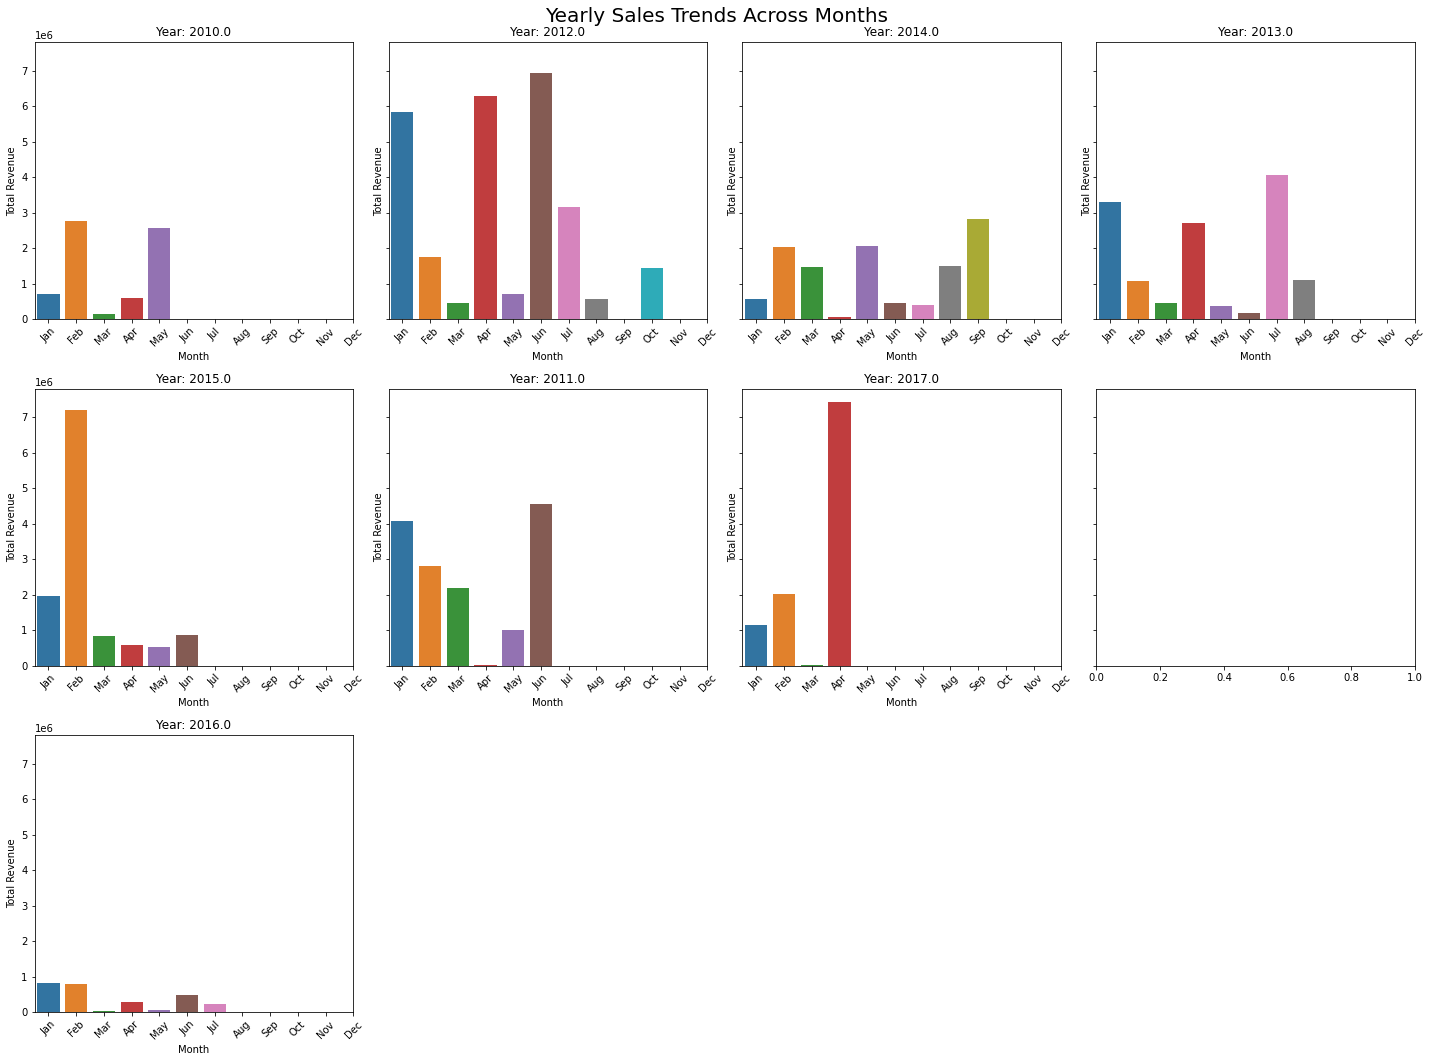

In [81]:
years = new_data['Year'].unique()

fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Yearly Sales Trends Across Months', fontsize=20)  # Title for the entire figure

for idx, year in enumerate(years):
    ax = axes[idx // 4, idx % 4]
    
    yearly_data = new_data[new_data['Year'] == year]
    
    monthly_revenue = yearly_data.groupby('Month')['Total Revenue'].sum().reset_index()
    
    
    if not monthly_revenue.empty:
        
        sns.barplot(x='Month', y='Total Revenue', data=monthly_revenue, ax=ax)
        
        ax.set(title=f'Year: {year}', xlabel='Month', ylabel='Total Revenue')
        ax.set_xticks(range(12))
        ax.set_xticklabels([
            'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
        ], rotation=45)  

for i in range(len(years), 3 * 4):
    fig.delaxes(axes[i // 4, i % 4])

plt.tight_layout()
plt.show()

# Revenue by Item Types Across Years

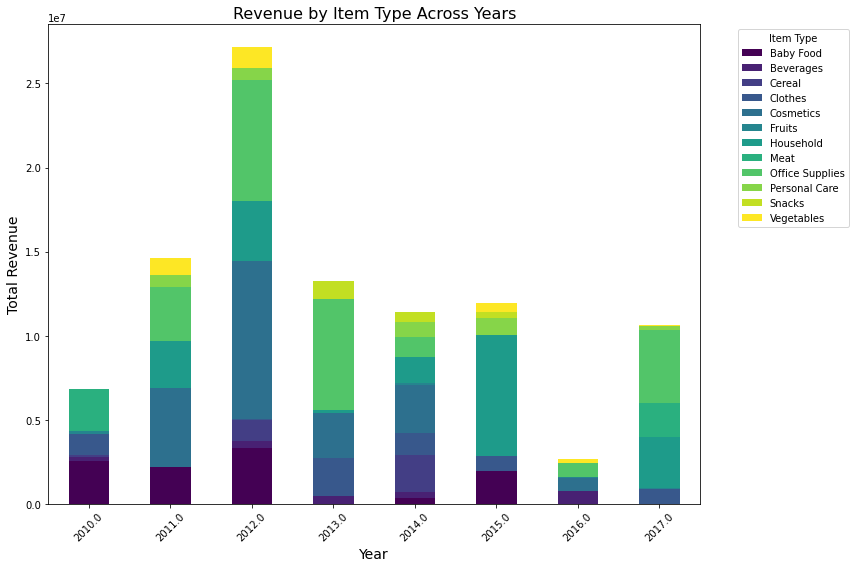

In [82]:
yearly_item_sales = new_data.groupby(['Year', 'Item Type'])['Total Revenue'].sum().unstack().fillna(0)

yearly_item_sales.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

plt.title('Revenue by Item Type Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()